$Se\ requiere\ una\ red\ neuronal\ que\ distinga\ entre\ dos\ nubes\ de\ puntos,\  que\ sea\ capaz\ den\ separarlos\ sin\ intervención\ humana:$

<ol>
<li> En un primer momento no se proporciona un imput asopciado a las nubes de puntos,  con lo cual se seleccionan nubes de </li>datos concéntricos,  para ello se utiliza la librería "make_circles" de sklearn.
    <ul>
    <li>Al mismo tiempo se importan las librerías necesarias.</li>
    </ul>
</ol>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
#para crear el data set se utiliza make_circles
from sklearn.datasets import make_circles

In [ ]:
n=1000
#Donde n es el numero de datos que se tienen de imput

p=2 

#es el numero de dimenciones
#esto hace que las multiplicaciones de matrices no matcheen
#la variable X es el Dataset que estamos tratando de resolver mientras que el Y es un vector binario.

X, Y = make_circles(
    n_samples=n,
    #shuffle=False,
    noise=0.25,
    #random_state=None,
    factor=0.28
)
print (X)
print (Y)
Y= Y[:, np.newaxis]
print(Y.shape)

A coontinuación graficamos los datos:

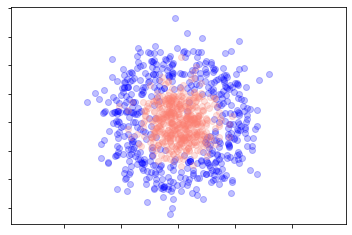

In [19]:
plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0,1], color="blue", alpha=0.25)
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1,1], color="Salmon",alpha=0.225)
plt.axis("equal")
plt.show
plt.tick_params(labelbottom=False, labelleft=False)

In [20]:
#creamos la clase de las capas de la red
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        
        self.act_f = act_f
        
        self.b = np.random.rand(1, n_neur)    *2-1
        self.W=np.random.rand(n_conn, n_neur) *2-1

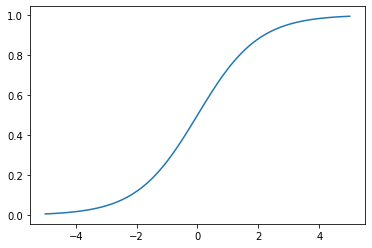

In [21]:
# creamos las funciones de activación.
# la función sigmoide y su derivada como pares. Asi se definen funciones matemáticas con Numpy
sigm=(lambda x: 1 / (1 + np.e ** (-x) ),
      lambda x: x * (1 - x))

_x=np.linspace(-5, 5,100)
plt.plot(_x, sigm[0](_x))

In [22]:
#l0=neural_layers(p, 4, sigm)
#l1=neural_layers(4, 8, sigm)
# creamos la topología (estructura de la red)
# estructura de datos que sostiene la estrctura de la red....nn[]

def create_nn(topology, act_f):
   
    nn = []
   
    for l, layer in enumerate(topology[:-1]):  ##enumerate es para trabajar con el bucle tanto el indice como la capa
        
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn


In [ ]:
# el proceso de entrenamiento conlleva tres pasos:
#procesamiento de los valores de entrada a través de la red mediente las capas y sus funciones de activación
#el resultado se compara con la infromación y se obtiene el error.
# decenso del gradiente para minimizar el error.
# así que hay que dfinir una "función de costo" una elasticidad!!!

topology = [p, 4, 6, 8, 1]
neural_net = create_nn(topology, sigm)

In [ ]:

# error cuadrático medio; YP: valor predicho;Yp: valor real

lcost = (lambda Yp, Yr: np.mean((Yp - Yr)**2),
           lambda Yp, Yr:(Yp-Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    #forward pass
    
    out = [(None, X)]
    
    for l,layer in enumerate(neural_net):
    
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)

        out.append((z, a)) # out es una predicción************
    #print(out[-1][1])
    #print(lcost[0](out[-1][1], Y)) # quiero el error cuadrático medio entonces es la primera entrada de la función de costo

    if train:
    
    #backward pass
        deltas=[]

        for l in reversed(range(0, len(neural_net))):
            
            z=out[l+1][0]
            a=out[l+1][1]
            
            #print(a.shape)# salidas si fuermos hacia atrás

            if l == len(neural_net) - 1:

                deltas.insert(0, lcost[1](a, Y) * neural_net[l].act_f[1](a))

            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

            _W=neural_net[l].W

    #descenso del gradiente
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    
        
    
    return out[-1][1]


train(neural_net, X, Y, lcost, 0.5)
print("")


In [ ]:
import time 
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss=[]

for i in range(15000):
    
    #entrenamiento e la red
    pY = train(neural_n, X, Y, lcost, lr=0.10)
    
    if i % 25 == 0:
        loss.append(lcost[0](pY, Y))
        
        res=50
        
        #genera una malla de 50X50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        
        
        for i0, x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, lcost, train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], c="blue", alpha=0.25)
        plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], c="salmon", alpha=0.225)
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)

